In [ ]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
import numpy as np
import de2 as de
import multiprocessing as mp
import makeqx as mkq
import oldqx as oqx


# anti-reflection coating
R_ref = np.linspace(100.0, 100.0, endpoint=True, num=50)
# narrow band transmission filter
R_ref[17] = 0.0


def rndtop5(x):
    return np.round(x*2.0)/2

def tmm_wrapper2(arg):
    args, kwargs = arg
    return oqx.tmm_eval_wsweep(*args, **kwargs)

def arc_par(pop, **kwargs):
    jobs = []
    pool=mp.Pool(90)
    for indiv in pop:
        #indiv = indiv.reshape((int(indiv.size/2), 2))
        #indiv[:,1] = mkq.digitize_qx(indiv[:,1], dlevels=2)
        indiv = rndtop5(indiv)
        #indiv = indiv.flatten()
        jobs.append((indiv, 0))
    arg = [(j, kwargs) for j in jobs]
    answ = np.array(pool.map(tmm_wrapper2, arg))
    pool.close()
    
    answref = np.tile(R_ref, (answ.shape[0], 1)) 
    
#     print(np.abs(answ - answref))
#     print ( np.mean(np.abs(answ - answref)))
    
    c1 = np.mean(np.abs(answref - answ), axis=1)
    c2 = np.zeros_like(c1)
    for idx, indiv in enumerate(pop):
        c2[idx] = np.sum(indiv)
        if c2[idx] <= 385:
            c2[idx] = 385/c2[idx]
        else:
            c2[idx] = 0.0
    return c1


num_layers = 20
d_min = 0
d_max = 105

bnds = [(d_min, d_max)]*num_layers
its_first = 0
psnew = 5*num_layers
islands = 5
its_second = 256
numgens = 5

isl = np.ones((psnew*islands, num_layers))
for indiv in range(int(psnew*islands)):
    isl[indiv] = np.random.uniform(0,1, num_layers)
    #isl[indiv] = qn.make_qxn(num_layers, dlevels=2)
poplist = np.split(isl, islands)

bids = np.zeros(islands, dtype=int)
bfits = np.zeros(islands)
bests = isl[0:islands]

for gen in range(numgens):
    print("==============================")
    print("Epoch #:" + str(gen + 1))
    print("==============================")
    
    for isln in range(islands):
        print("----------------- I-" + str(isln + 1)+ "---------------------")
        poplist[isln], bids[isln], bfits[isln], bests[isln] = de.de_cp(
            fobj=arc_par, 
            bounds=bnds, 
            pop=poplist[isln], 
            history=[], 
            it_start=its_first, 
            popsize=psnew, 
            its=its_second, 
            lam_low=400, 
            lam_high=800, 
            lam_pts=50)
        print(np.sum(bests[isln]))
        
    if its_second > 64:
        its_second = int(its_second/2)
    
    if gen < (numgens - 1):
        print("Round robin best migration")
        stmp = np.copy(poplist[islands-1][bids[islands-1]])
        for isln in range(1, islands):
            poplist[isln][bids[isln]] = poplist[isln-1][bids[isln-1]]
        poplist[0][bids[0]] = stmp 
    
print(bfits) 
print(bests[np.argmin(bfits)])

print(np.sum(bests[np.argmin(bfits)]))

Epoch #:1
----------------- I-1---------------------
19 7.228902561084357


In [ ]:
arc_par(poplist[0
               
               
               ])

(400, 800)

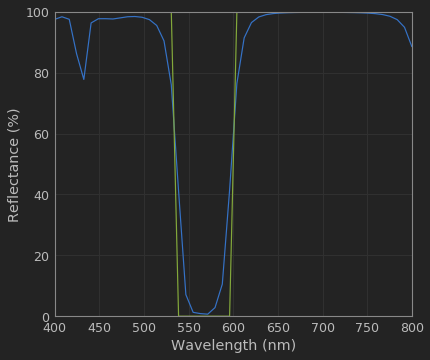

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

Rs = oqx.tmm_eval_wsweep(rndtop5(bests[np.argmin(bfits)]),0, lam_pts=50)

#Rs = qn.tmm_eval_wsweep(qx, d_min=2 , d_max=10, inc_ang=0, lam_low=400, lam_high=800, lam_pts=50, n_subs=1.52)  # in nm
lams = np.linspace(400, 800, endpoint=True, num=50)

meanl = np.ones_like(lams)*np.mean(oqx.tmm_eval_wsweep(rndtop5(bests[np.argmin(bfits)]),0))
plt.plot(lams, Rs )
plt.plot(lams, R_ref)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.ylim([0,100])
plt.xlim([400,800])


In [16]:
R_ref = np.linspace(400.0, 800.0, endpoint=True, num=50)
# narrow band transmission filter
#R_ref[0:83] = 0.0
R_ref

array([400.        , 408.16326531, 416.32653061, 424.48979592,
       432.65306122, 440.81632653, 448.97959184, 457.14285714,
       465.30612245, 473.46938776, 481.63265306, 489.79591837,
       497.95918367, 506.12244898, 514.28571429, 522.44897959,
       530.6122449 , 538.7755102 , 546.93877551, 555.10204082,
       563.26530612, 571.42857143, 579.59183673, 587.75510204,
       595.91836735, 604.08163265, 612.24489796, 620.40816327,
       628.57142857, 636.73469388, 644.89795918, 653.06122449,
       661.2244898 , 669.3877551 , 677.55102041, 685.71428571,
       693.87755102, 702.04081633, 710.20408163, 718.36734694,
       726.53061224, 734.69387755, 742.85714286, 751.02040816,
       759.18367347, 767.34693878, 775.51020408, 783.67346939,
       791.83673469, 800.        ])

In [ ]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
import numpy as np
import de2 as de
import multiprocessing as mp
import makeqx as mkq
import qxnew as qn    

def rndtop5(x):
    return np.round(x*2.0)/2

def tmm_wrapper2(arg):
    args, kwargs = arg
    return qn.tmm_eval_wsweep(*args, **kwargs)

def arc_par(pop, **kwargs):
    jobs = []
    pool=mp.Pool(90)
    for indiv in pop:
        indiv = indiv.reshape((int(indiv.size/2), 2))
        indiv[:,1] = mkq.digitize_qx(indiv[:,1], dlevels=2)
        indiv[:,0] = rndtop5(indiv[:,0])
        indiv = indiv.flatten()
        jobs.append((indiv, 0, 1, 0))
    arg = [(j, kwargs) for j in jobs]
    answ = np.array(pool.map(tmm_wrapper2, arg))
    pool.close()
    
    c1 = np.mean(answ, axis=1)
    c2 = np.zeros_like(c1)
    for idx, indiv in enumerate(pop):
        c2[idx] = np.sum(indiv[::2])
        if c2[idx] <= 480:
            c2[idx] = 480/c2[idx]
        else:
            c2[idx] = 0.0
    return c1

    
num_layers = 25
d_min = 0.5
d_max = 20 

bnds = [(d_min, d_max), (0,1)]*num_layers
its_first = 0
psnew = 40
islands = 9
its_second = 256
numgens = 5

isl = np.ones((psnew*islands, 2*num_layers))
for indiv in range(int(psnew*islands)):
    isl[indiv] = np.random.uniform(0,1, 2*num_layers)
    #isl[indiv] = qn.make_qxn(num_layers, dlevels=2)
poplist = np.split(isl, islands)

bids = np.zeros(islands, dtype=int)
bfits = np.zeros(islands)
bests = isl[0:islands]


for gen in range(numgens):
    print("==============================")
    print("Epoch #:" + str(gen + 1))
    print("==============================")
    
    for isln in range(islands):
        print("----------------- I-" + str(isln + 1)+ "---------------------")
        poplist[isln], bids[isln], bfits[isln], bests[isln] = de.de_cp(
            fobj=arc_par, 
            bounds=bnds, 
            pop=poplist[isln], 
            history=[], 
            it_start=its_first, 
            popsize=psnew, 
            its=its_second, 
            lam_low=400, 
            lam_high=800, 
            lam_pts=50)
        print(np.sum(bests[isln][::2]))
    
    if its_second > 64:
        its_second = int(its_second/2)
    
    if gen < (numgens - 1):
        print("Round robin best migration")
        stmp = np.copy(poplist[islands-1][bids[islands-1]])
        for isln in range(1, islands):
            poplist[isln][bids[isln]] = poplist[isln-1][bids[isln-1]]
        poplist[0][bids[0]] = stmp 
    
print(bfits) 
print(bests[np.argmin(bfits)][::2])
print(bests[np.argmin(bfits)][1::2])
print(np.sum(bests[np.argmin(bfits)][::2]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
bri = bests[np.argmin(bfits)][1::2]
brx = bests[np.argmin(bfits)][::2]
xarr = np.cumsum(brx)
print(bri)
# plt.plot(xarr, bri)
# plt.show()

In [ ]:
def rndtop5(x):
    return np.round(x*2.0)/2
rndtop5(1.63)

In [ ]:
lams

In [ ]:
lams[88]